In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


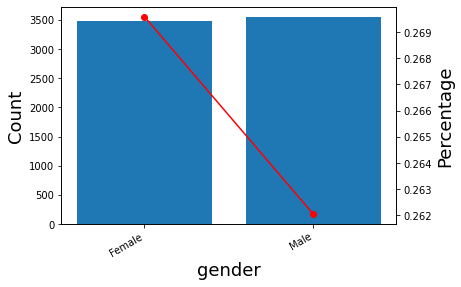

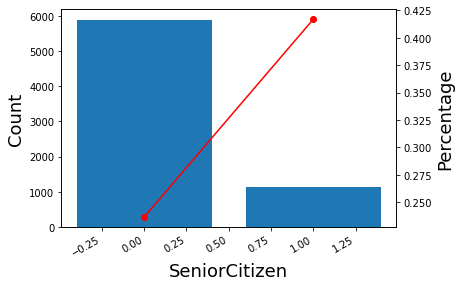

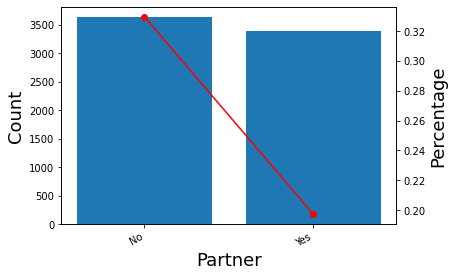

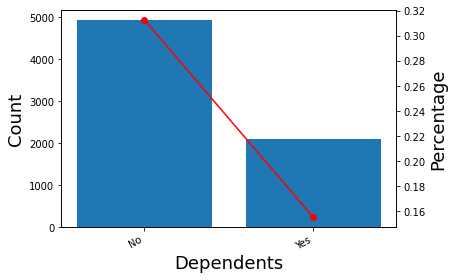

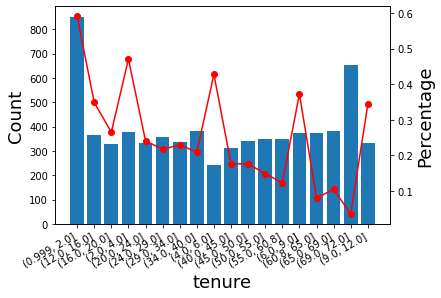

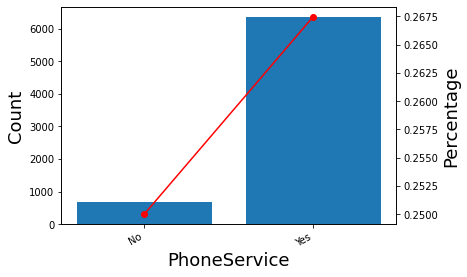

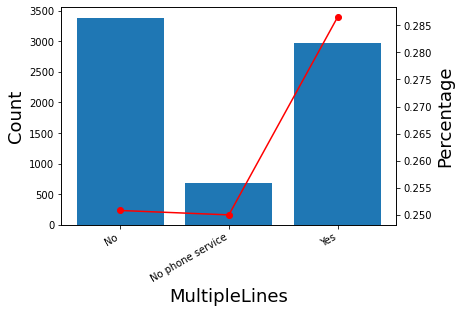

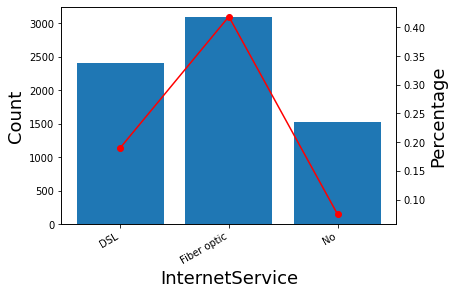

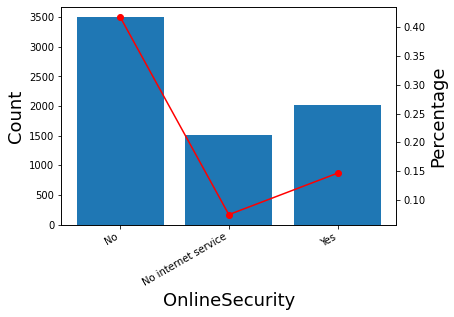

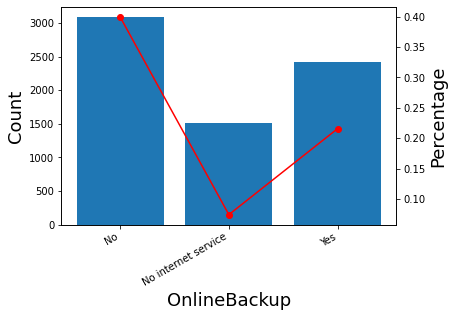

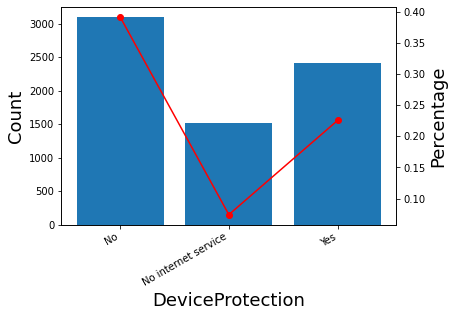

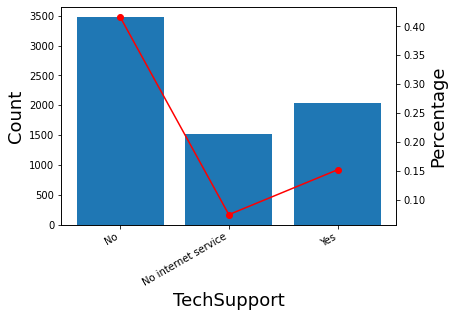

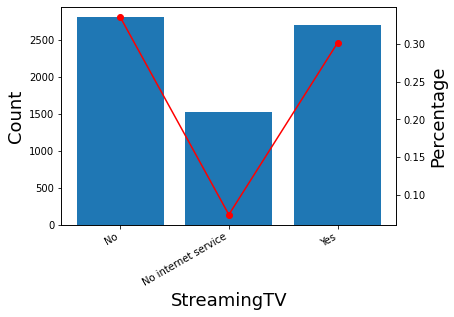

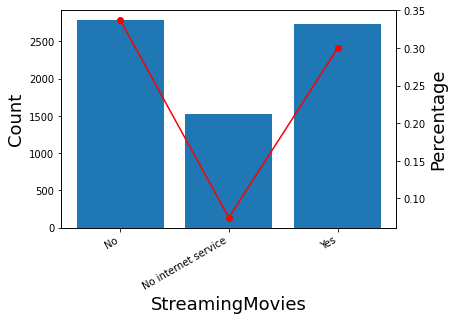

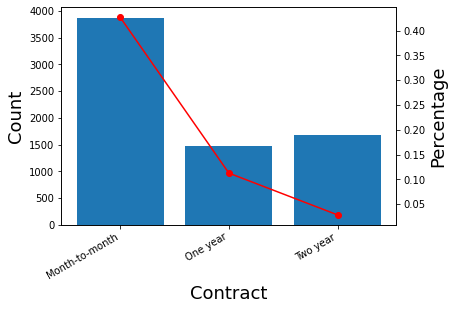

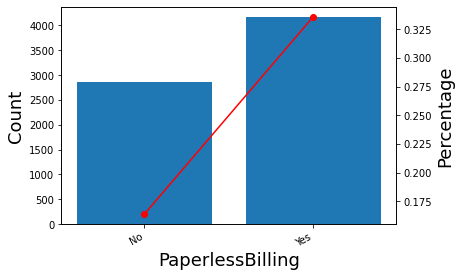

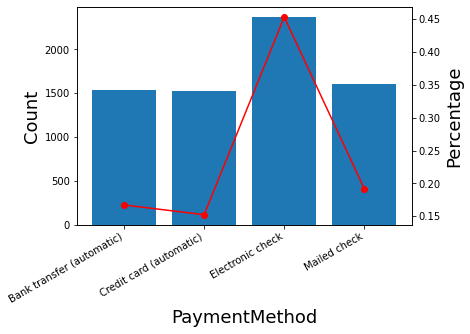

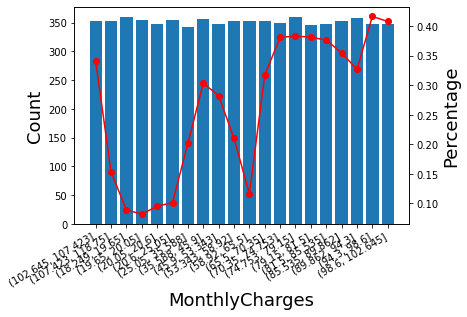

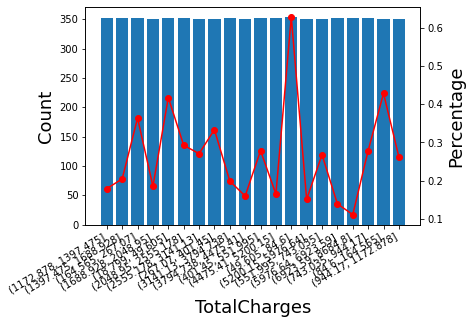

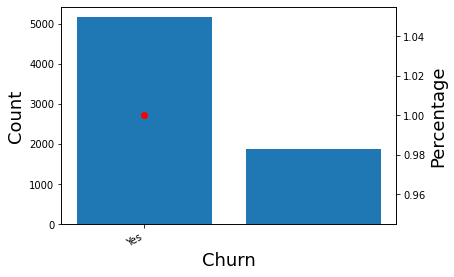

In [17]:
#-----------  Feature Target y interaction graph ------------#
df["y"]=df["Churn"]
df["y"] = df["y"].factorize()[0]
df.drop(['customerID'], axis=1, inplace=True)
z = df.columns
z=z.drop("y","Churn")
for i in z:
    dc=df.copy()
    if dc[str(i)].nunique()>= 25:
        dc=dc[[str(i),'y']]
        dc=dc.sort_values(by=str(i),ascending=True)
        dc[str(i)]=pd.qcut(dc[str(i)], q=20,duplicates='drop').astype(str)
        dc=dc.sort_values(by=str(i),ascending=True)
    else:
        pass
    a=dc[["y",str(i)]].value_counts()
    a=pd.DataFrame(a).reset_index()
    a.columns = ['y',str(i),'Count']
    a=a[a["y"]==1]

    b=dc[[str(i)]].value_counts()
    b=pd.DataFrame(b).reset_index()
    b.columns = [str(i),'Count']
    b=b.sort_values(by=str(i),ascending=True)
    
    c=dc["y"].groupby(dc[str(i)]).count().to_frame()
    c=c.reset_index()
    
    ab=pd.merge(a, c, how='inner', on=[str(i)])
    ab['Percentage']=ab["Count"]/ab["y_y"]
    ab=ab.sort_values(by=str(i),ascending=True)
    """
    fig, ax = plt.subplots() # Create the figure and axes object
    # Plot the first x and y axes:
    b.plot(x = str(i), y = 'Count', ax = ax, kind='bar') 
    # Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
    ab.plot(x = str(i), y = 'Percentage', ax = ax, secondary_y = True, color = 'r',marker='o') 
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    """
    
    fig, ax = plt.subplots() # Create the figure and axes object
    ax2 = ax.twinx()
    ax.bar(b[str(i)], b['Count']) 
    # Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
    ax2.plot(ab[str(i)],ab['Percentage'], color = 'r',marker='o')
    ax.set_xlabel(str(i),fontsize=18)
    ax.set_ylabel('Count',fontsize=18)
    ax2.set_ylabel('Percentage',fontsize=18)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')